Теоретический материал – Эволюционные методы
Деревья решений являются одним из наиболее эффективных
Эволюционные методы
Эволюционные методы относятся к числу эффективных средств
решения задач оптимизации и структурного синтеза проектных решений.
Они основаны на использовании принципов оптимального приспособления
организмов в живой природе к условиям окружающей среды. К числу
эволюционных относятся методы генетические, колонии муравьев,
поведения толпы. Наиболее развиты и востребованы в настоящее время
генетические алгоритмы. По мере развития техники и технологий растет
доля сложных задач проектирования и управления, для решения которых
применение традиционных методов проблематично. Поэтому все большее
внимание уделяется применению методов искусственного интеллекта.
Генетические алгоритмы Для применения ГА необходимо:
1. выделить совокупность свойств объекта, характеризуемых
внутренними параметрами и влияющих на его полезность, т.е. выделить
множество управляемых параметровX=(x_1,x_2,…,x_n) среди x_i могут
быть величины различных типов (real, integer, Boolean, enumeration).
Наличие нечисловых величин (enumeration) обусловливает возможность
решения задач не только параметрической, но и структурной оптимизации;
2. сформулировать количественную оценку полезности вариантов
объекта — функцию полезности F. Если в исходном виде задача
многокритериальна, то такая формулировка означает выбор скалярного
(обобщенного) критерия;
3. представить вектор X в форме хромосомы — записи
следующего вида:
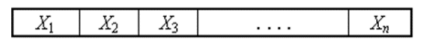
Этапы генетического алгоритма могут быть представлены в
следующем виде:
for (k=0; k<G; k++)
{ for (j=0; j<N; j++)
 { Выбор родительской пары хромосом;
 Кроссовер;
 Мутации;
 Оценка функции полезности F потомков;
 Селекция;
 }
 Замена текущего поколения новым;
}

In [10]:
#Пример 1.1.1

def qZ(x,y):
    return (x-3*y+1)/(3*x**2+3*y**2+1)

def qSumZ(Z):
    return sum(Z)

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]

    X[0] = oldX[sortedId[0]]

    X[1] = oldX[sortedId[1]]

    Y[0] = oldY[sortedId[2]]
    Y[1] = oldY[sortedId[2]]

    Y[2] = oldY[sortedId[0]]

    Y[3] = oldY[sortedId[1]]

    return X,Y

def sorting(Z):
    sortedId = sorted(range(len(Z)), key = lambda k: Z[k])

    return sortedId

def evoStep(X,Y,Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X,Y,Z

def evoSteps(X,Y, stepsNum = 4):
    results = []

    for i in range(4):
        arrZ = [qZ(x,Y[i]) for i, x in enumerate(X)]

        X,Y,Z = evoStep(X, Y, arrZ)
        X,Y = exchangeScheme(X,Y, sorting(Z))

        results.append([X,Y, qSumZ(arrZ), arrZ])

    return X, Y, results

def main():
    X = [-2, -1, 0, 1]
    Y = [-2, -1, 0, 1]
    results = evoSteps(X,Y)

    for i in range(len(results[2])):
        print(f'max_{i+1}_step: {results[2][i][2]}')

    qualityArrZ = []

    for i in range(len(results[2])):
        qualityArrZ += results[2][i][3]

    print(f'max Z:      {max(qualityArrZ)}')


if __name__ == "__main__":
    main()



max_1_step: 1.4857142857142858
max_2_step: 1.4615384615384615
max_3_step: 2.967032967032967
max_4_step: 3.5384615384615383
max Z:      1.0


In [11]:
#Задание 1

def qZ(x, y):
    return (x - 3 * y - 3) / (x ** 2 + 2 * y ** 2 + 1)


def qSumZ(Z):
    return sum(Z)


def exchangeScheme(oldX, oldY, sortdID):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]

    X[2] = oldX[sortdID[2]]
    X[3] = oldX[sortdID[2]]
    X[0] = oldX[sortdID[0]]
    X[1] = oldX[sortdID[1]]

    Y[0] = oldY[sortdID[2]]
    Y[1] = oldY[sortdID[2]]
    Y[2] = oldY[sortdID[0]]
    Y[3] = oldY[sortdID[1]]

    return X, Y


def sorting(Z):
    sortedID = sorted(range(len(Z)), key=lambda k: Z[k])
    return sortedID


def evoStep(X, Y, Z):
    _, minId = min((value, id) for (id, value) in enumerate(Z))
    X = X[:]
    Y = Y[:]
    Z = Z[:]

    X.pop(minId)
    Y.pop(minId)
    Z.pop(minId)

    return X, Y, Z


def evoSteps(X, Y):
    results = []

    for i in range(4):
        arrZ = [qZ(x, Y[i]) for i, x in enumerate(X)]
        X, Y, Z = evoStep(X, Y, arrZ)
        X, Y = exchangeScheme(X, Y, sorting(Z))
        results.append([X, Y, qSumZ(arrZ), arrZ])

    return X, Y, results

def main():
    X = [-5, -3, -2, -1]
    Y = [-1, -2, 0, 1]

    results = evoSteps(X, Y)

    for i in range(len(results[2])):
        print(f'max_{i + 1}_step: {results[2][i][2]}')

    qualityArrZ = []
    for i in range(len(results[2])):
        qualityArrZ += results[2][i][3]

    print(f'max Z: {max(qualityArrZ)}')

if __name__ == "__main__":
    main();

max_1_step: -2.928571428571429
max_2_step: -0.8319004524886877
max_3_step: -0.2676147382029735
max_4_step: 0.09502262443438915
max Z: 0.07692307692307693


1.2. Теоретический материал – Метод имитации отжига
Алгоритм отжига – это метод оптимизации, который называется
отжигом, или симуляцией восстановления (Simulated annealing). Как ясно из
названия, метод поиска моделирует процесс восстановления.
Восстановление – это физический процесс, который заключается в нагреве
и последующем контролируемом охлаждении субстанции. В результате
получается прочная кристаллическая структура, которая отличается от
структуры с дефектами, образующейся при быстром беспорядочном
охлаждении. Структура здесь представляет собой кодированное решение, а
температура используется для того, чтобы указать, как и когда будут
приниматься новые решения.
Алгоритм имитации отжига включает следующие этапы:
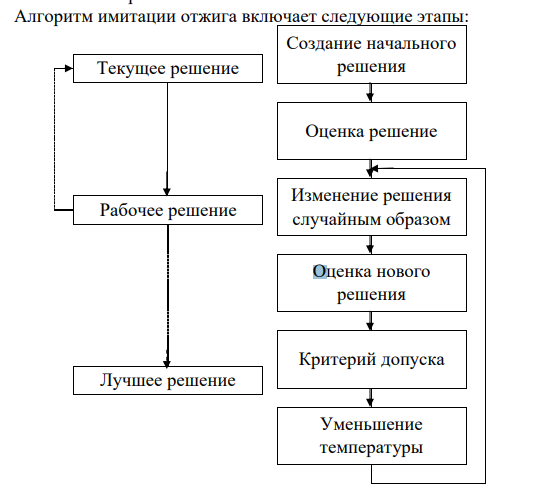
Метод отжига может быть эффективным при решении задач
различных классов, требующих оптимизации. Ниже приводится их краткий
список:
1. создание пути;
2. реконструкция изображения;
3. назначение задач и планирование;
4. размещение сети;
5. глобальная маршрутизация;
6. обнаружение и распознавание визуальных объектов;
7. разработка специальных цифровых фильтров.
Поскольку метод отжига представляет собой процесс генерации
случайных чисел, поиск решения с использованием данного алгоритма
может занять значительное время. В некоторых случаях алгоритм вообще не
находит решение или выбирает не самое оптимальное. Алгоритм отжига как
способ выполнения процедур поиска и оптимизации. Данный метод является
аналогом процесса нагревания тела до состояния плавления с последующим
постепенным охлаждением. При высоких температурах поиск ведется по
всему диапазону. При снижении температуры диапазон поиска уменьшается
до небольшой области вокруг текущего решения.
Рассмотрим решение задачи поиска оптимального маршрута на графе
методом имитации отжига Для этого, представим формальную постановку
задачи и рассмотрим пример, который иллюстрирует алгоритм решения.
Итак, необходимо Найти длину гамильтонова цикла 𝑆4 в полном графе
𝐾6 после четырех циклов решения задачи методом отжига. Даны расстояния
𝐿𝑖,𝑗 между вершинами. Даны также: начальная последовательность вершин
𝐿0, последовательность замен вершин 𝑍 и выпавшие при этом вероятности
перехода 𝑃𝑘, 𝑘 = 1, . . . , 4.
Переход на худшее (∆𝑆𝑘 = 𝑆𝑘 − 𝑆𝑘−1 > 0) решение допустим, если
𝑃∗ = 100где снижение температуры происходит по закону 𝑇𝑘+1 = 0.5𝑇𝑘 от
𝑇1 = 100.


Лучший выбранный маршрут: [1, 6, 2, 3, 4, 5, 1]
Длина лучшего выбранного маршрута: 146
Длины всех рассмотренных маршрутов: [189, 209, 186, 146, 166]
None


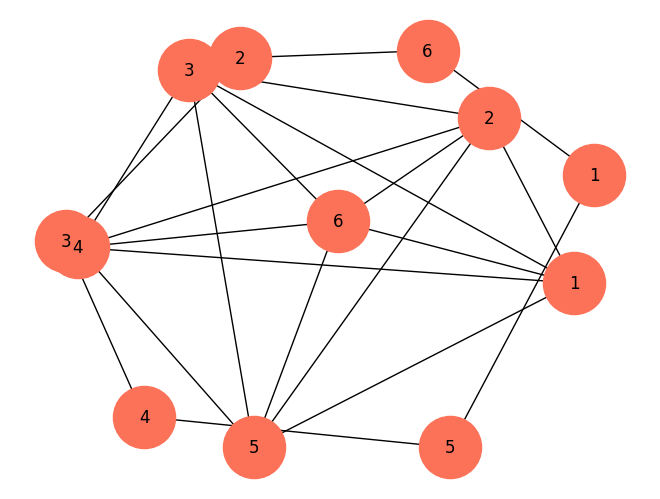

In [4]:
import networkx as nx
from math import e

def main():
    distances = [(1, 2, 20), (1, 3, 40), (1, 4, 42),
             (1, 5, 33), (1, 6, 21), (2, 3, 26),
             (2, 4, 38), (2, 5, 42), (2, 6, 17),
             (3, 4, 22), (3, 5, 43), (3, 6, 21),
             (4, 5, 27), (4, 6, 22), (5, 6, 26)]

    V = [1, 4, 5, 2, 6, 3, 1]

    Z = [(3, 4),
        (4, 6),
        (5, 2),
        (6, 2)]

    P = [49, 54, 43, 54]
    T = 100
    graph = nx.Graph()
    graph.add_weighted_edges_from(distances)
    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

    bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

    print(f'Лучший выбранный маршрут: {bestRoute}')
    print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
    print(f'Длины всех рассмотренных маршрутов: {arrLength}')
    print(drawRouteGraph(distances, bestRoute))


def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT


def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or
                                (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)


def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV


def routeReplacement (V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    for i in range(len(Z)):
        newV = routeOneReplacement (V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T)
    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)


    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)

if __name__ == "__main__":
    main()


Лучший выбранный маршрут: [1, 5, 6, 2, 4, 3, 1]
Длина лучшего выбранного маршрута: 157
Длины всех рассмотренных маршрутов: [138, 126, 151, 157, 178]
None


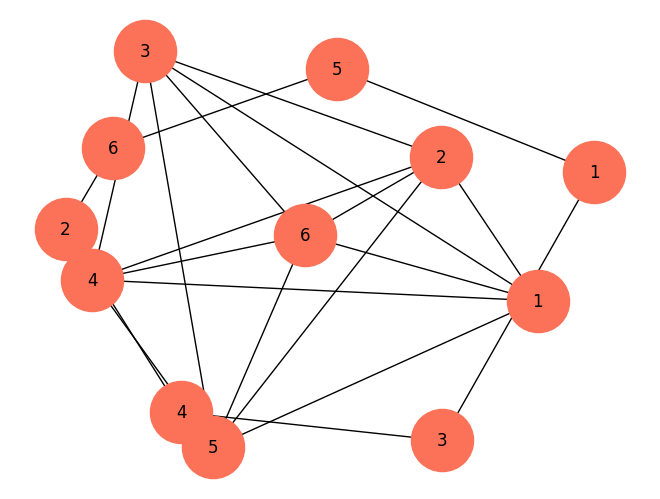

In [5]:
# Задание №1

import networkx as nx
from math import e

distances = [(1, 2, 17), (1, 3, 39), (1, 4, 32),
             (1, 5, 28), (1, 6, 18), (2, 3, 24),
             (2, 4, 28), (2, 5, 35), (2, 6, 13),
             (3, 4, 25), (3, 5, 43), (3, 6, 23),
             (4, 5, 20), (4, 6, 16), (5, 6, 24)]

V = [1, 3,4,5,6,2,1]

Z = [(2,4), (4, 6),
     (3, 5), (5, 2)]

P = [51,23,29,31]
T = 100


def probability(delta, T):
    return 100 * e ** (-delta / T)


def reductTemp(prevT):
    nextT = 0.5 * prevT
    return nextT


graph = nx.Graph()
graph.add_weighted_edges_from(distances)
nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


def edgeLength(i, j, distances, roundTrip = True):
    if roundTrip:
        return max([(item[2] if (item[0] == i and item[1] == j) or
                                (item[1] == i and item[0] == j) else -1) for item in distances])
    else:
        return max([(item[2] if (item[0] == i and item[1] == j) else -1) for item in distances])


def routeLength(V, distances):
    edges = []

    for i in range(len(V) - 1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
    return sum(edges)


def routeOneReplacement(arrV, Z, replacementByName = True):
    decrement = 1 if replacementByName else 0
    arrV[Z[0] - decrement], arrV[Z[1] - decrement] = arrV[Z[1] - decrement], arrV[Z[0] - decrement]
    return arrV


def routeReplacement (V, Z):
    for z in Z:
        V = routeOneReplacement(V, z)
    return V


def chooseRoute(distances, V, Z, T, P):
    sumLength = routeLength(V, distances) # нахождение длины пути
    arrSum = [sumLength] # массив сумм длин

    for i in range(len(Z)):
        newV = routeOneReplacement (V[:], Z[i]) # новый маршрут после перестановки
        newS = routeLength(newV, distances) # длина нового маршрута
        arrSum.append(newS)
        deltaS = newS - sumLength # разница между длиной нового и старого маршрутов

        if deltaS > 0:
            p = probability(deltaS, T) # подсчёт вероятности
            if p > P[i]:
                V = newV
                sumLength = newS
        else:
            V = newV
            sumLength = newS

        T = reductTemp(T)
    return V, arrSum

def drawRouteGraph(distances, bestRoute):
    newDistances = []
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if distance[0] == bestRoute[i] and distance[1] == bestRoute[i + 1] or distance[1] == bestRoute[i] and distance[0] == bestRoute[i + 1]:
                newDistances.append(distance)


    graph = nx.Graph()
    graph.add_weighted_edges_from(newDistances)

    nx.draw_kamada_kawai(graph, node_color = '#fb7258', node_size = 2000, with_labels = True)


bestRoute, arrLength = chooseRoute(distances, V, Z, T, P)

print(f'Лучший выбранный маршрут: {bestRoute}')
print(f'Длина лучшего выбранного маршрута: {routeLength(bestRoute, distances)}')
print(f'Длины всех рассмотренных маршрутов: {arrLength}')
print(drawRouteGraph(distances, bestRoute))